<a href="https://colab.research.google.com/github/Hyunjoon83/SelfStudy/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

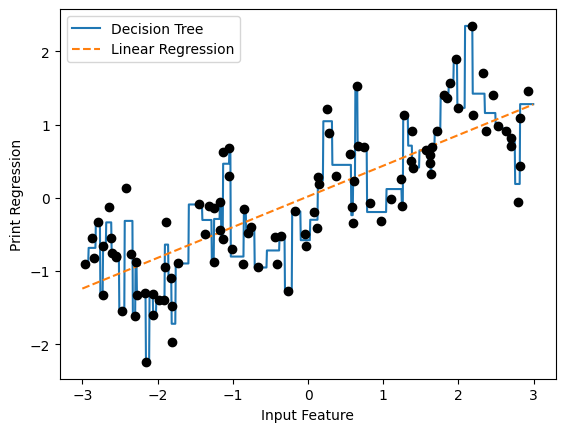

In [ ]:
# 구간 분할, 이산화, 선형모델, 트리모델
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import mglearn

X,y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label="Decision Tree")

reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label="Linear Regression")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.legend(loc="best")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Text(0.5, 0, 'Input Feature')

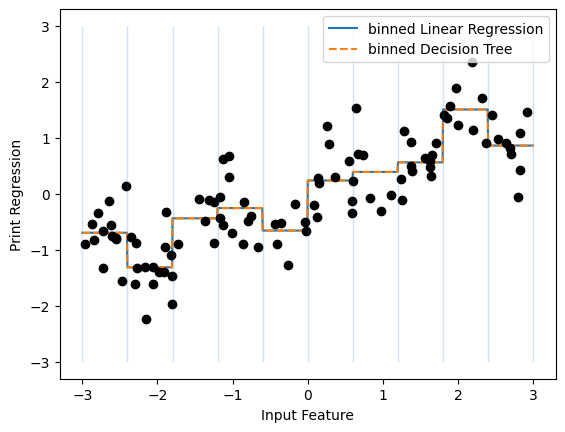

In [ ]:
from sklearn.preprocessing import OneHotEncoder

bins=np.linspace(-3,3,11)
which_bin=np.digitize(X,bins=bins)
# 변환을 위해 OneHotEncoder 사용
encoder=OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾음
encoder.fit(which_bin)
# OneHotEncodinh으로 변환
X_binned=encoder.transform(which_bin)

line_binned=encoder.transform(np.digitize(line,bins=bins))

reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned), label="binned Linear Regression")

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),'--',label="binned Decision Tree")
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")

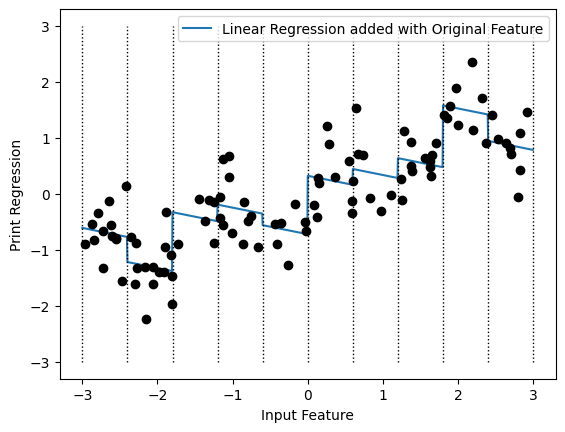

In [ ]:
X_combined=np.hstack([X,X_binned])

reg=LinearRegression().fit(X_combined,y)

line_combined=np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='Linear Regression added with Original Feature')

for bin in bins:
  plt.plot([bin,bin],[-3,3],':',c='k',linewidth=1)
plt.legend(loc="best")
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.plot(X[:,0],y,'o',c='k')

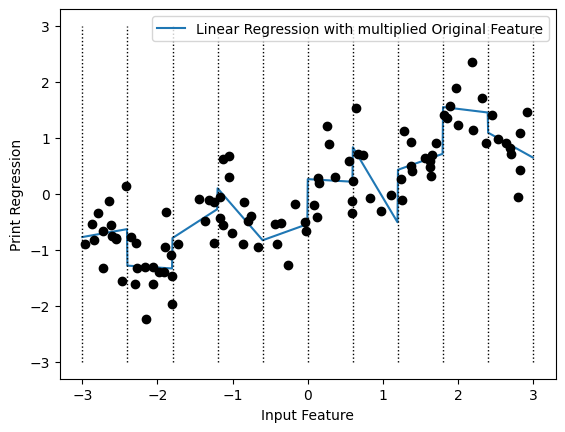

In [ ]:
X_product=np.hstack([X_binned,X*X_binned])

reg=LinearRegression().fit(X_product,y)

line_product=np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),
         label="Linear Regression with multiplied Original Feature")

for bin in bins:
  plt.plot([bin,bin],[-3,3],':',c='k',linewidth=1)
plt.legend(loc="best")
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.plot(X[:,0],y,'o',c='k')

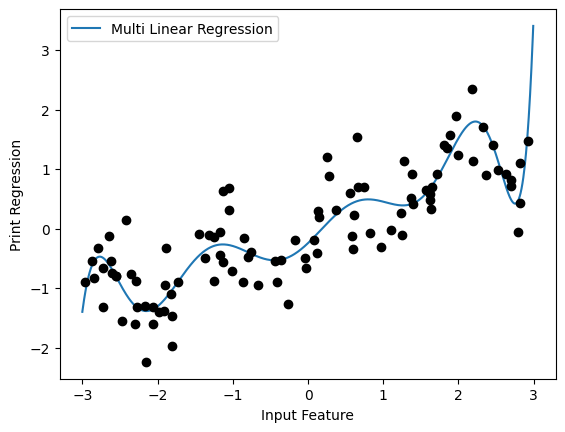

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# x**10 까지 고차항을 추가
# 기본값인 "include_bias=True"는 절편을 위해 값이 1인 특성을 추가
poly=PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly=poly.transform(X)

reg=LinearRegression().fit(X_poly, y)

line_poly=poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="Multi Linear Regression")
plt.legend(loc="best")
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.plot(X[:,0],y,'o',c='k')

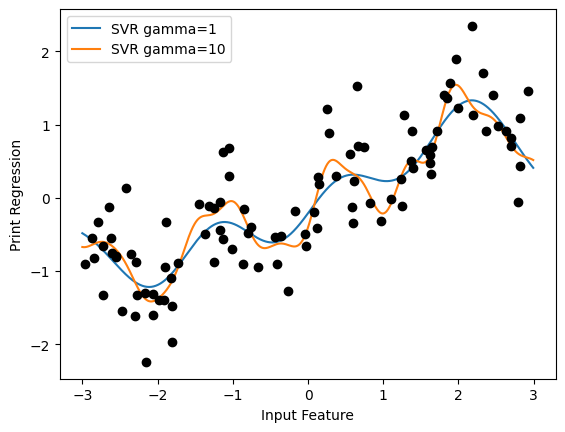

In [ ]:
from sklearn.svm import SVR

for gamma in [1,10]:
  svr=SVR(gamma=gamma).fit(X,y)
  plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.legend(loc="best")
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.plot(X[:,0],y,'o',c='k')

Text(0.5, 0, 'Value')

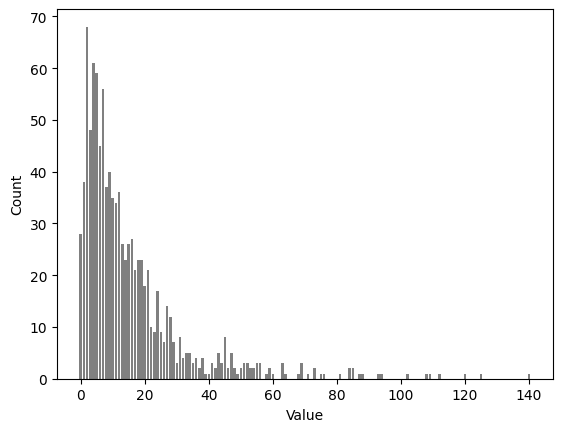

In [ ]:
rnd=np.random.RandomState(0)
X_org=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)

X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)

bins=np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='grey')
plt.ylabel("Count")
plt.xlabel("Value")

Text(0.5, 0, 'Value')

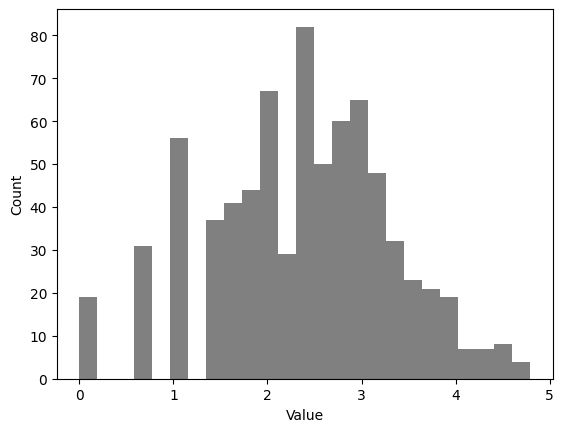

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
score=Ridge().fit(X_train, y_train).score(X_test, y_test)

X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test+1)

score=Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
plt.hist(X_train_log[:,0],bins=25, color='gray')
plt.ylabel("Count")
plt.xlabel("Value")

Text(0.5, 0, 'Feature No.')

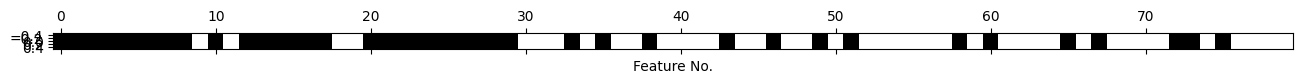

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()

# 고정된 난수 발생
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))
# 데이터에 노이즈 특성 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈
X_w_noise=np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test=train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5
)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택
select=SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용
X_train_selected=select.transform(X_train)

mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Feature No.")

Text(0.5, 0, 'Feature No.')

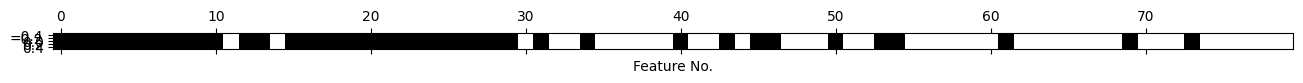

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

select.fit(X_train, y_train)
X_train_l1=select.transform(X_train)

mask=select.get_support()
# True는 검은색, False는 흰색으로 마스킹
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Feature No.")

Text(0.5, 0, 'Feature No.')

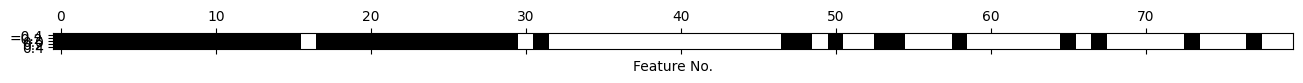

In [ ]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100, random_state=42),
           n_features_to_select=40)

select.fit(X_train, y_train)
# 선택한 특성을 표시
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Feature No.")

/usr/local/lib/python3.10/dist-packages/mglearn/datasets.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


Text(0, 0.5, 'Rent Count')

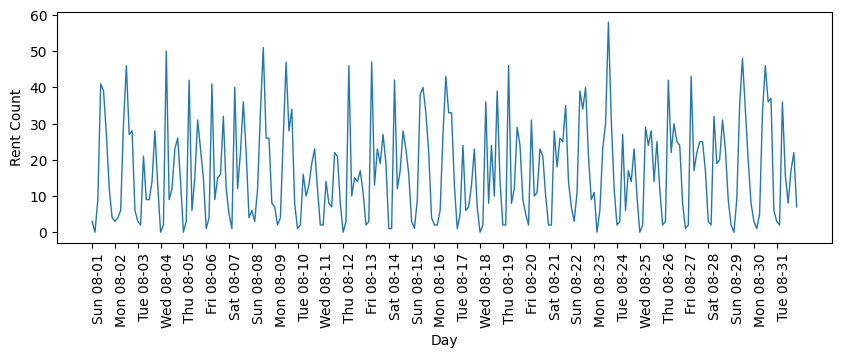

In [ ]:
citibike=mglearn.datasets.load_citibike()

plt.figure(figsize=(10,3))
xticks=pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
week=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
xticks_name=[week[int(w)]+d for w, d in zip(xticks.strftime("%w"),xticks.strftime(" %m-%d"))]

plt.xticks(xticks,xticks_name,rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("Day")
plt.ylabel("Rent Count")

Test Set R^2: -0.04


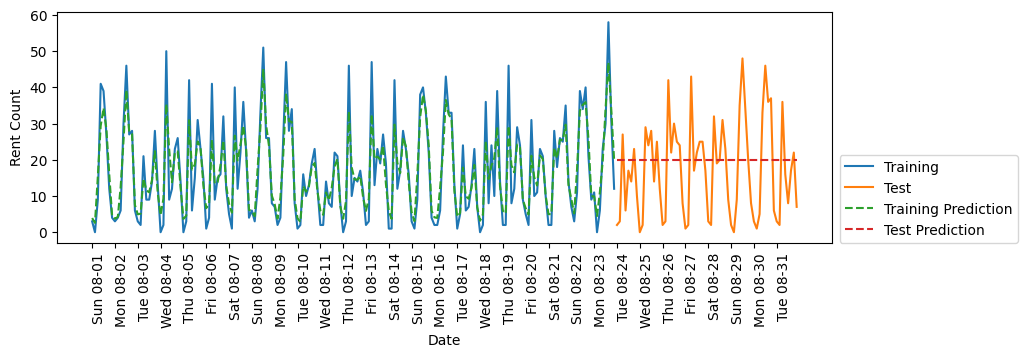

In [ ]:
# 타깃값 추출 (대여 횟수)
y=citibike.values
# POSIX 시간을 10**9로 나누어 변환
X=citibike.index.astype("int64").values.reshape(-1,1) // 10**9

# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용
n_train=184

# 주어진 특성을 사용하여 평가하고 그래프를 그림
def eval_on_features(features, target, regressor):
  # 훈련 세트와 테스트 세트로 나눔
  X_train,X_test=features[:n_train],features[n_train:]
  # 타깃값도 나눔
  y_train, y_test=target[:n_train], target[n_train:]
  regressor.fit(X_train, y_train)
  print("Test Set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
  y_pred=regressor.predict(X_test)
  y_pred_train=regressor.predict(X_train)
  plt.figure(figsize=(10,3))

  plt.xticks(range(0,len(X),8), xticks_name, rotation=90, ha="left")

  plt.plot(range(n_train), y_train, label="Training")
  plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="Test")
  plt.plot(range(n_train), y_pred_train, '--', label="Training Prediction")

  plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label="Test Prediction")
  plt.legend(loc=(1.01,0))
  plt.xlabel("Date")
  plt.ylabel("Rent Count")

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X,y,regressor)

Test Set R^2: 0.60


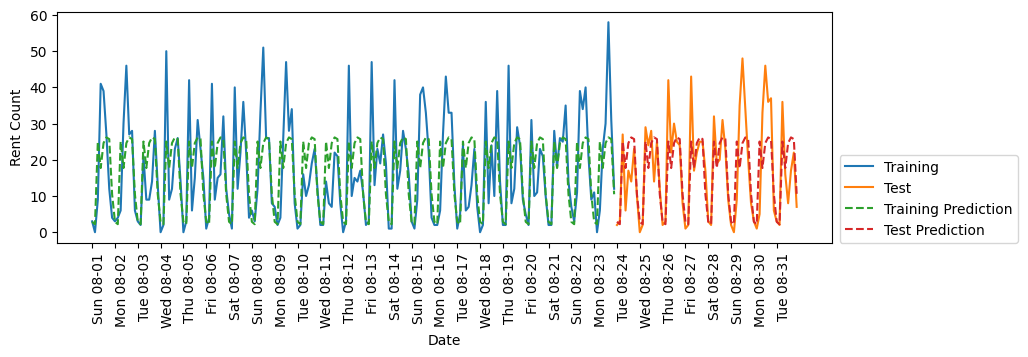

In [ ]:
X_hour=citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

Test Set R^2: 0.84


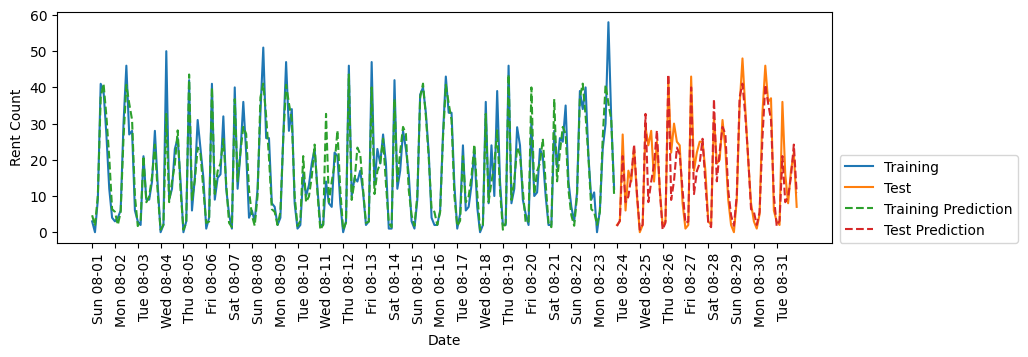

In [ ]:
X_hour_week=np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                       citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

Test Set R^2: 0.13


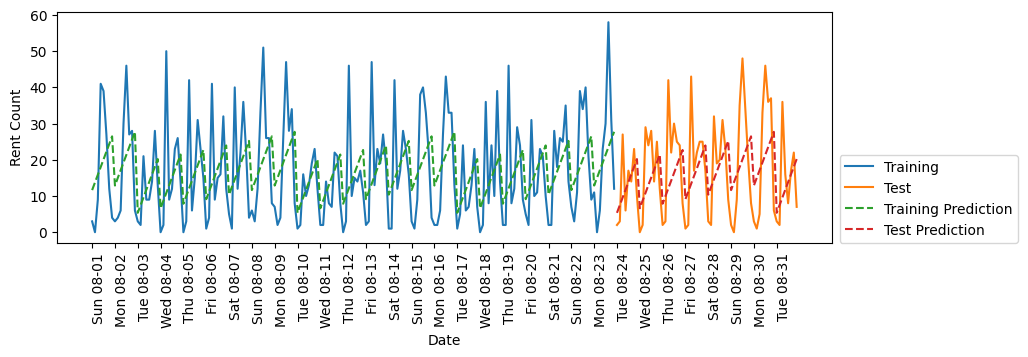

In [ ]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

Test Set R^2: 0.62


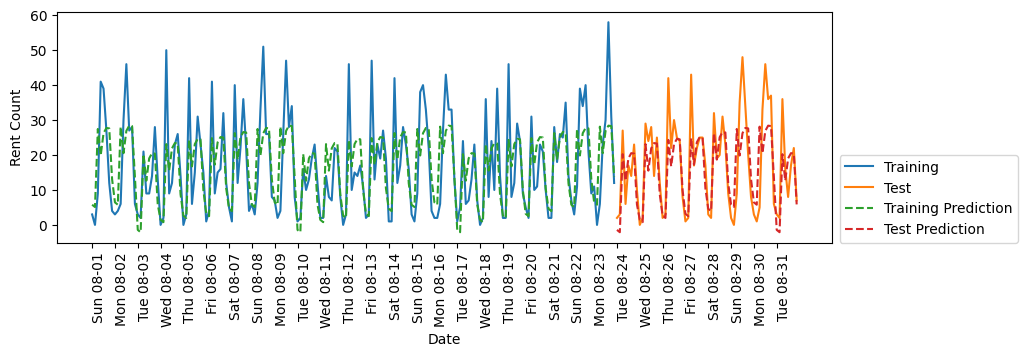

In [ ]:
enc=OneHotEncoder()
X_hour_week_onehot=enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

Test Set R^2: 0.85


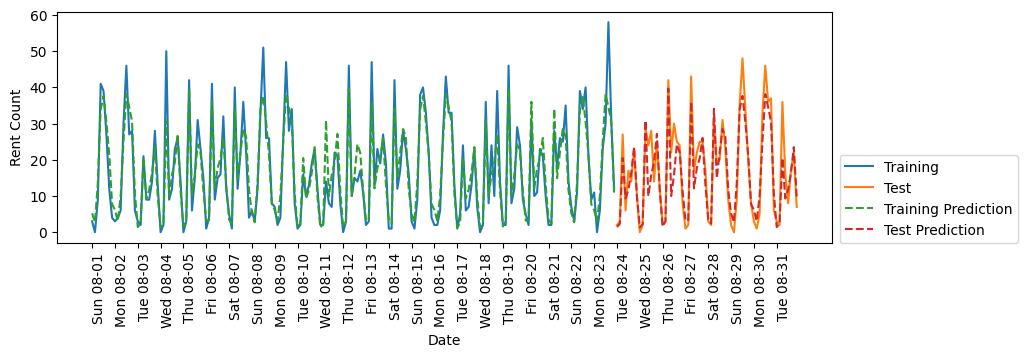

In [ ]:
poly_transformer=PolynomialFeatures(degree=2, interaction_only=True,
                                    include_bias=False)
X_hour_week_onehot_poly=poly_transformer.fit_transform(X_hour_week_onehot)
lr=Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)